### This notebook is made for Coventry University's 7088CEM ANN Coursework
By Sunggu Choi

Dataset: https://www.kaggle.com/crowww/a-large-scale-fish-dataset

chois11@uni.coventry.ac.uk

In [7]:
# !pip3 install tensorflow
# !pip install pydot
# !pip install pydotplus
# !sudo apt-get install graphviz for Debian
# https://graphviz.org/download/ for Windows

 # Required to save models in HDF5 format
# !pip install -q pyyaml h5py 


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomZoom # Dataa augmentation
from tensorflow.keras.layers.experimental.preprocessing import *
from tensorflow import keras
# from tensorflow.keras.fta.metrics import RSquare
import sklearn



import numpy as np

import datetime 
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

import cv2
from sklearn import preprocessing
from pathlib import Path

In [2]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
import datetime
%load_ext tensorboard
%tensorboard --logdir ./logs
# %tensorboard --logdir logs/model_fits
# rm -rf ./logs/
# %reload_ext tensorboard

# If not works remove 
# !taskkill /IM "tensorboard.exe" /F

# !rmdir /AppData/Local/Temp/.tensorboard-info
# On windows:
# Kill the processes

# !taskkill /F /PID 20036

# %tensorboard --logdir logs/fits

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 22980.

In [4]:
!dir Fish_Dataset

 Volume in drive C is Blade 15 SSD
 Volume Serial Number is 3226-871E

 Directory of C:\Users\dkaos\Documents\GitHub\ANN_7088CEM\Fish_Dataset

24/03/2021  17:44    <DIR>          .
24/03/2021  17:44    <DIR>          ..
18/03/2021  15:57    <DIR>          Black Sea Sprat
18/03/2021  15:57    <DIR>          Gilt-Head Bream
18/03/2021  15:57    <DIR>          Hourse Mackerel
18/03/2021  15:57    <DIR>          Red Mullet
18/03/2021  15:57    <DIR>          Red Sea Bream
18/03/2021  15:57    <DIR>          Sea Bass
18/03/2021  15:57    <DIR>          Shrimp
18/03/2021  15:57    <DIR>          Striped Red Mullet
18/03/2021  15:57    <DIR>          Trout
               0 File(s)              0 bytes
              11 Dir(s)  36,646,404,096 bytes free


In [3]:
# Load the dataset
image_size = (244, 244)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Fish_Dataset",
    validation_split=0.2,
    subset="training",
    seed=7566,
    labels='inferred',
#     class_names=None
#     shuffle=True,
    label_mode='int',
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Fish_Dataset",
    validation_split=0.2,
    subset="validation",
    seed=7566,
    labels='inferred',
#     class_names=None
#     shuffle=True,
    label_mode='int',
    image_size=image_size,
    batch_size=batch_size,
)

# Use buffered prefetching to load images from disk without having I/O become blocking. 


class_names = train_ds.class_names
print(class_names)




val_batches = tf.data.experimental.cardinality(val_ds) # taking 20% from val_ds
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.
['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
Number of validation batches: 46
Number of test batches: 11


### Data Exploration

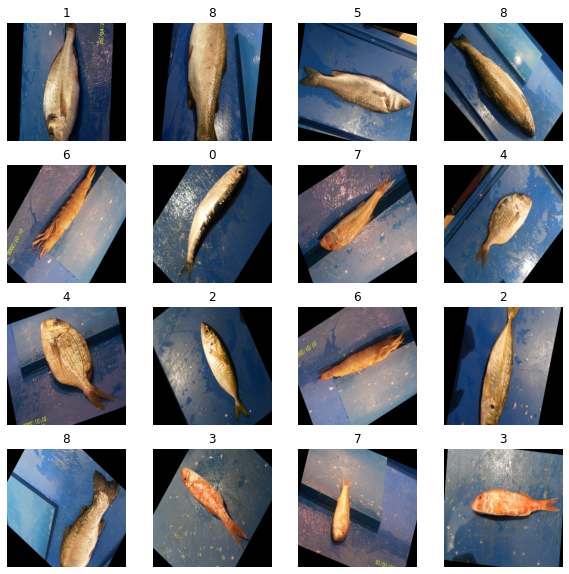

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

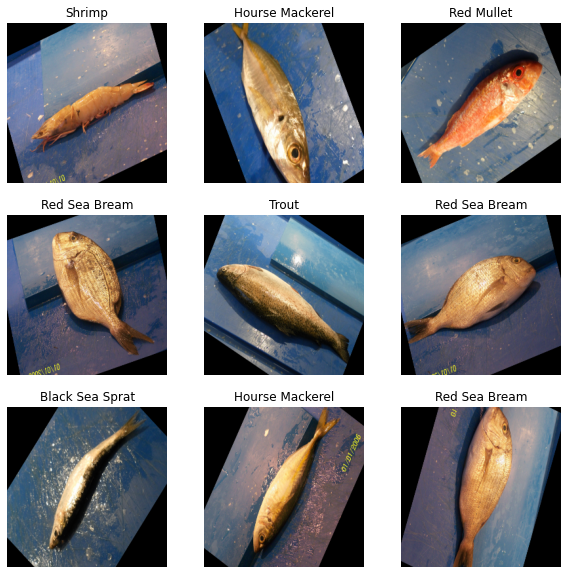

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# Image augmentation
# It helps to training by getting a various angle of images

data_augmentation = Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
    ]
)
# Check arugmented images
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

In [4]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds= train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [7]:
##### Data standardisation
# Since the images are standard size 180x180, with float32, RGB channels are im 0,255 range - Not good for NN

# Standardise values into 1,0 by using Rescaling layer at the model

def CNN_model_with_two_layers(train_ds, val_ds, input_s, epochs):
# def CNN_model(input_shape, num_classes):
# First block
    model = Sequential()
#     model.add(Rescaling(1./255, input_shape=(input_s)))
#     model.add(RandomRotation(0.1))
#     model.add(RandomZoom(0.1))

    data_augmentation 
    model.add(Conv2D(64, (3,3), strides=(1,1), padding ="same", input_shape = input_s))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(64, (3,3), strides=(1,1), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(64, (3,3), strides=(1,1), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))

    model.add(Dense(9)) # Number of classes
    
    model.add(Dense(units = 9, activation ='softmax')) # Since it contains more then 2 classes
    
    model.summary()

    model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

    log_dir = "./logs/custom" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    model.fit(train_ds, validation_data=val_ds, epochs=epochs ,callbacks=[tensorboard_callback])
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    
    loss, accuracy = model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    model.save('./saved_model/my_model') # save the model
    print("Model saved")
#     print('=====CNN precision ,Recall,f1-score for each class============')
#     print(metrics.classification_report(test_dataset ,predictions))
    
CNN_model_with_two_layers(train_ds, val_ds, (244, 244, 3), 20)

# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 244, 244, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)       

In [8]:
# Using a saved model

cus_saved_model = tf.keras.models.load_model('./saved_model/my_model')
cus_saved_model.summary()

# Evaluate the restored model
loss, acc = cus_saved_model.evaluate(test_dataset)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 244, 244, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)       

NameError: name 'val_1' is not defined

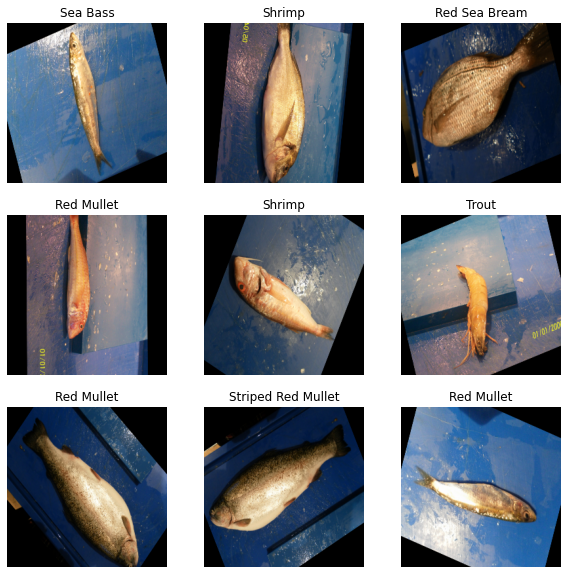

In [35]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[y_pred[i]])
  plt.axis("off")

In [ ]:
predictions = cus_saved_model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)

print('Predictions:\n', val_1)
print('Labels:\n', class_names)

#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [84]:
test_dataset

<TakeDataset shapes: ((None, 244, 244, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
def vgg_16_model(train_ds, val_ds, input_s, epochs):
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(input_s)))
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
#     model.add(name=name)
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2))) # Avarage pooling

    # Second block
    model.add(Conv2D(128, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(128, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Third block
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Forth block
    model.add(Conv2D(512, (3,3),  padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3),  padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3),  padding ="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Fifth block
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Connect the layers
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))

    model.add(Dense(256))
    model.add(Activation("relu"))

    model.add(Dense(9, activation ='softmax')) # Since it contains more then 2 classe    
    
    
    model.summary()


    model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

    log_dir = "./logs/vgg16" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

    model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[tensorboard_callback, callback])
    
    
    loss, accuracy = model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)

    model.save('./saved_model/vgg16_custom') # save the model
    print("Model saved")

vgg_16_model(train_ds, val_ds, (244,244,3), 25)

# Dataset IO
# train_ds = train_ds.prefetch(buffer_size=32)
# val_ds = val_ds.prefetch(buffer_size=32

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 244, 244, 3)       0         
_________________________________________________________________
random_rotation_3 (RandomRot (None, 244, 244, 3)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 244, 244, 3)       0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 244, 244, 3)       12        
_________________________________________________________________
activation_92 (Activation)   (None, 244, 244, 3)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 244, 244, 64)      1792      
_________________________________________________________________
activation_93 (Activation)   (None, 244, 244, 64)    

In [ ]:
# Using a saved model

vgg16_saved_model = tf.keras.models.load_model('./saved_model/vgg16_custom')
vgg16_saved_model.summary()

# Evaluate the restored model
loss, acc = vgg16_saved_model.evaluate(test_dataset)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


In [9]:
def alexNet_model(train_ds, val_ds, input_s, epochs):
    model = Sequential()
    
    data_augmentation

    model.add(Conv2D(96, (11,11), strides=(4,4), padding = "same",input_shape = input_s))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(4,4))) # Avarage pooling
    
    model.add(Conv2D(256, (3,3), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))) # Avarage pooling
    
    model.add(Conv2D(384, (3,3), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (1,1), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (1,1), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))) # Avarage pooling
    
    
    # Connect the layers
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation("relu"))
    
    model.add(Dense(256))
    model.add(Activation("relu"))
    
    model.add(Dense(units = 9, activation ='softmax')) # Since it contains more then 2 classes
    
    model.summary()

    model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

    log_dir = "./logs/alexnet" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[tensorboard_callback, callback])
    
    loss, accuracy = model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)

    model.save('./saved_model/alexnet_custom') # save the model
    print("Model saved")
    

alexNet_model(train_ds, val_ds, (244, 244,3), 25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 61, 61, 96)        34944     
_________________________________________________________________
activation_5 (Activation)    (None, 61, 61, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       221440    
_________________________________________________________________
activation_6 (Activation)    (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)      

In [ ]:
# Using a saved model

alexnet_saved_model = tf.keras.models.load_model('./saved_model/vgg16_custom')
alexnet_saved_model.summary()

# Evaluate the restored model
loss, acc = vgg16_saved_model.evaluate(test_dataset)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
